In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("projectdata.csv")

In [3]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1.0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2.0,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3.0,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4.0,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5.0,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [4]:
df.shape

(1021845, 11)

In [5]:
df=df.iloc[0:100000,:]

In [6]:
df.isnull().any()

Unnamed: 0            False
CASE_STATUS           False
EMPLOYER_NAME          True
SOC_NAME               True
JOB_TITLE             False
FULL_TIME_POSITION    False
PREVAILING_WAGE       False
YEAR                  False
WORKSITE              False
lon                    True
lat                    True
dtype: bool

In [7]:
df.describe()

,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,100000.000000,1.000000e+05,100000.0,96830.000000,96830.000000
mean,50000.500000,1.006428e+05,2016.0,-91.214916,38.092220
std,28867.657797,2.049853e+06,0.0,21.662490,4.688468
min,1.000000,0.000000e+00,2016.0,-157.858333,13.437192
25%,25000.750000,5.537000e+04,2016.0,-112.074037,34.151749
50%,50000.500000,6.886500e+04,2016.0,-84.387982,39.641763
75%,75000.250000,9.297600e+04,2016.0,-74.077642,40.728158
max,100000.000000,3.291392e+08,2016.0,145.729789,64.837778


In [8]:
df['CASE_STATUS'].fillna(df["CASE_STATUS"].mode()[0],inplace=True)
df['EMPLOYER_NAME'].fillna(df["EMPLOYER_NAME"].mode()[0],inplace=True)
df['SOC_NAME'].fillna(df["SOC_NAME"].mode()[0],inplace=True)
df["JOB_TITLE"].fillna(df["JOB_TITLE"].mode()[0],inplace=True)
df['FULL_TIME_POSITION'].fillna(df["FULL_TIME_POSITION"].mode()[0],inplace=True)
df['PREVAILING_WAGE'].fillna(df["PREVAILING_WAGE"].median(),inplace=True)
df['YEAR'].fillna(df["YEAR"].median(),inplace=True)


In [9]:
#d=d.drop(['Unnamed: 0','lat','lon','EMPLOYER_NAME','WORKSITE'],axis=1)

In [10]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1.0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2.0,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3.0,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4.0,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5.0,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [11]:
df['OCCUPATION'] = np.nan
df['SOC_NAME'] = df['SOC_NAME'].str.lower()
df.OCCUPATION[df['SOC_NAME'].str.contains('computer','programmer')] = 'computer occupations'
df.OCCUPATION[df['SOC_NAME'].str.contains('software','web developer')] = 'computer occupations'
df.OCCUPATION[df['SOC_NAME'].str.contains('database')] = 'computer occupations'
df.OCCUPATION[df['SOC_NAME'].str.contains('math','statistic')] = 'Mathematical Occupations'
df.OCCUPATION[df['SOC_NAME'].str.contains('predictive model','stats')] = 'Mathematical Occupations'
df.OCCUPATION[df['SOC_NAME'].str.contains('teacher','linguist')] = 'Education Occupations'
df.OCCUPATION[df['SOC_NAME'].str.contains('professor','Teach')] = 'Education Occupations'
df.OCCUPATION[df['SOC_NAME'].str.contains('school principal')] = 'Education Occupations'
df.OCCUPATION[df['SOC_NAME'].str.contains('medical','doctor')] = 'Medical Occupations'
df.OCCUPATION[df['SOC_NAME'].str.contains('physician','dentist')] = 'Medical Occupations'
df.OCCUPATION[df['SOC_NAME'].str.contains('Health','Physical Therapists')] = 'Medical Occupations'
df.OCCUPATION[df['SOC_NAME'].str.contains('surgeon','nurse')] = 'Medical Occupations'
df.OCCUPATION[df['SOC_NAME'].str.contains('psychiatr')] = 'Medical Occupations'
df.OCCUPATION[df['SOC_NAME'].str.contains('chemist','physicist')] = 'Advance Sciences'
df.OCCUPATION[df['SOC_NAME'].str.contains('biology','scientist')] = 'Advance Sciences'
df.OCCUPATION[df['SOC_NAME'].str.contains('biologi','clinical research')] = 'Advance Sciences'
df.OCCUPATION[df['SOC_NAME'].str.contains('public relation','manage')] = 'Management Occupation'
df.OCCUPATION[df['SOC_NAME'].str.contains('management','operation')] = 'Management Occupation'
df.OCCUPATION[df['SOC_NAME'].str.contains('chief','plan')] = 'Management Occupation'
df.OCCUPATION[df['SOC_NAME'].str.contains('executive')] = 'Management Occupation'
df.OCCUPATION[df['SOC_NAME'].str.contains('advertis','marketing')] = 'Marketing Occupation'
df.OCCUPATION[df['SOC_NAME'].str.contains('promotion','market research')] = 'Marketing Occupation'
df.OCCUPATION[df['SOC_NAME'].str.contains('business','business analyst')] = 'Business Occupation'
df.OCCUPATION[df['SOC_NAME'].str.contains('business systems analyst')] = 'Business Occupation'
df.OCCUPATION[df['SOC_NAME'].str.contains('accountant','finance')] = 'Financial Occupation'
df.OCCUPATION[df['SOC_NAME'].str.contains('financial')] = 'Financial Occupation'
df.OCCUPATION[df['SOC_NAME'].str.contains('engineer','architect')] = 'Architecture & Engineering'
df.OCCUPATION[df['SOC_NAME'].str.contains('surveyor','carto')] = 'Architecture & Engineering'
df.OCCUPATION[df['SOC_NAME'].str.contains('technician','drafter')] = 'Architecture & Engineering'
df.OCCUPATION[df['SOC_NAME'].str.contains('information security','information tech')] = 'Architecture & Engineering'
df['OCCUPATION']= df.OCCUPATION.replace(np.nan, 'Others', regex=True)

C:\Users\gouth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gouth\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\gouth\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

C:\Users\gouth\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\gouth\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\gouth\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\gouth\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A valu

In [12]:
df.head(3)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,OCCUPATION
0,1.0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,biochemists and biophysicists,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,Advance Sciences
1,2.0,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",chief executives,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843,Management Occupation
2,3.0,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",chief executives,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,Management Occupation


In [13]:
df["WORKSITE"].value_counts()

NEW YORK, NEW YORK             14424
SAN FRANCISCO, CALIFORNIA       3598
HOUSTON, TEXAS                  3038
CHICAGO, ILLINOIS               2780
LOS ANGELES, CALIFORNIA         1850
                               ...  
VERONA, NEW YORK                   1
SEBASTIAN, FLORIDA                 1
FT WASHINGTON, PENNSYLVANIA        1
CHARLES TOWN, WEST VIRGINIA        1
SELBYVILLE, DELAWARE               1
Name: WORKSITE, Length: 4001, dtype: int64

In [14]:
df["OCCUPATION"].value_counts()

computer occupations          28313
Others                        27285
Financial Occupation          24601
Management Occupation         16069
Architecture & Engineering     1340
Business Occupation            1252
Medical Occupations             761
Marketing Occupation            378
Advance Sciences                  1
Name: OCCUPATION, dtype: int64

In [15]:
df['state'] = df.WORKSITE.str.split('\s+').str[-1]

In [16]:
df.head(1)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,OCCUPATION,state
0,1.0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,biochemists and biophysicists,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,Advance Sciences,MICHIGAN


In [17]:
df["state"].value_counts()

CALIFORNIA       20479
YORK             17736
TEXAS             8914
JERSEY            5905
ILLINOIS          5246
FLORIDA           3949
MASSACHUSETTS     3815
PENNSYLVANIA      3368
GEORGIA           3005
WASHINGTON        2929
VIRGINIA          2718
CAROLINA          2502
OHIO              1864
MICHIGAN          1851
CONNECTICUT       1472
MARYLAND          1421
MINNESOTA         1185
ARIZONA            990
WISCONSIN          859
COLORADO           858
TENNESSEE          857
COLUMBIA           825
MISSOURI           804
INDIANA            801
UTAH               564
OREGON             489
DELAWARE           461
ARKANSAS           415
NEVADA             363
IOWA               330
ALABAMA            310
KENTUCKY           303
OKLAHOMA           286
ISLAND             266
KANSAS             250
HAMPSHIRE          244
NA                 211
LOUISIANA          190
NEBRASKA           172
HAWAII             150
IDAHO               92
MEXICO              92
MAINE               86
MISSISSIPPI

In [18]:
#df['STATE1'] = np.nan
df['state'] = df['state'].str.lower()
df.replace(to_replace=['california','illinois','massachusetts','georgia','pennsylvania','alaska','alabama','dakota'],value='california city',inplace=True)
df.replace(to_replace=['york','virginta','virginia','michigan','ohio','colorado','connecticut','delaware','rico','mississippi','nebraska','vermont','idaho'],value='new york',inplace=True)
df.replace(to_replace=['texas','maryland','arizona','minnesota','utah','columbia'],value='texas',inplace=True)
df.replace(to_replace=['florida','wisconsin','oregon','indiana','nevada','missouri','washington','na','island','kentucky','oklahoma','kansas'],value='florida',inplace=True)
df.replace(to_replace=['jersey','louisiana','hampshire','jersy','arkansas','hawaii','iowa','carolina','tennessee','maine','mexico','wyoming','montana'],value='jersey',inplace=True)




In [19]:
df.shape

(100000, 13)

In [20]:
df.CASE_STATUS[df['CASE_STATUS']=='REJECTED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='INVALIDATED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'] = 'DENIED'
df.CASE_STATUS[df['CASE_STATUS']=='CERTIFIED-WITHDRAWN'] = 'CERTIFIED'

C:\Users\gouth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gouth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gouth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

In [21]:
df = df.drop(df[df.CASE_STATUS == 'WITHDRAWN'].index)

In [22]:
df.shape

(95787, 13)

In [23]:
df["CASE_STATUS"].value_counts()

CERTIFIED    93597
DENIED        2190
Name: CASE_STATUS, dtype: int64

In [24]:
df.isnull().any()

Unnamed: 0            False
CASE_STATUS           False
EMPLOYER_NAME         False
SOC_NAME              False
JOB_TITLE             False
FULL_TIME_POSITION    False
PREVAILING_WAGE       False
YEAR                  False
WORKSITE              False
lon                    True
lat                    True
OCCUPATION            False
state                 False
dtype: bool

In [25]:
df.head(1)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,OCCUPATION,state
0,1.0,CERTIFIED,UNIVERSITY OF MICHIGAN,biochemists and biophysicists,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,Advance Sciences,new york


In [26]:
df=df.drop(['WORKSITE','EMPLOYER_NAME','SOC_NAME','JOB_TITLE','WORKSITE','lon','lat',],axis=1)
#d["JOB_TITLE"]+="-"+d["SOC_NAME"]
#d=d.drop(["SOC_NAME"],axis=1)

In [27]:
df.head(1)

,Unnamed: 0,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,OCCUPATION,state
0,1.0,CERTIFIED,N,36067.0,2016.0,Advance Sciences,new york


In [28]:
df=df.drop(['Unnamed: 0'],axis=1)

In [29]:
df.head(1)

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,OCCUPATION,state
0,CERTIFIED,N,36067.0,2016.0,Advance Sciences,new york


In [30]:
df["OCCUPATION"].value_counts()

computer occupations          26709
Others                        26092
Financial Occupation          23776
Management Occupation         15633
Architecture & Engineering     1275
Business Occupation            1197
Medical Occupations             746
Marketing Occupation            358
Advance Sciences                  1
Name: OCCUPATION, dtype: int64

In [31]:
df["state"].value_counts()

california city    34898
new york           26296
texas              13360
florida            10949
jersey             10284
Name: state, dtype: int64

In [79]:
df.head(40)

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,OCCUPATION,state
0,0,0,36067.00,2016.0,0,3
1,0,1,242674.00,2016.0,4,4
2,0,1,193066.00,2016.0,4,2
3,0,1,220314.00,2016.0,4,3
5,0,1,225000.00,2016.0,4,1
6,0,1,91021.00,2016.0,4,4
7,0,1,150000.00,2016.0,4,0
8,0,1,127546.00,2016.0,4,4
10,0,1,182978.00,2016.0,4,0
11,0,1,163717.00,2016.0,4,3


In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["CASE_STATUS"]=le.fit_transform(df["CASE_STATUS"])
#d["WITHDRAWN"]=le.fit_transform(d["WITHDRAWN"])
#d["EMPLOYER_NAME"]=le.fit_transform(d["EMPLOYER_NAME"])
df["OCCUPATION"]=le.fit_transform(df["OCCUPATION"])
df["state"]=le.fit_transform(df["state"])
df["FULL_TIME_POSITION"]=le.fit_transform(df["FULL_TIME_POSITION"])
#d["WORKSITE"]=le.fit_transform(d["WORKSITE"])

In [34]:
le.classes_

array(['N', 'Y'], dtype=object)

In [35]:
df.head(1)

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,OCCUPATION,state
0,0,0,36067.0,2016.0,0,3


In [36]:
x=df.iloc[:,1:6].values
y=df.iloc[:,0:1].values

In [37]:
x.shape

(95787, 5)

In [38]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [39]:
#x.drop(["SOC_NAME"],axis=1)
df.head(1)

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,OCCUPATION,state
0,0,0,36067.0,2016.0,0,3


In [40]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder()
z=oh.fit_transform(x[:,3:4]).toarray()
u=oh.fit_transform(x[:,4:5]).toarray()
#u1=oh.fit_transform(x[:,2:3]).toarray()
#u=oh.fit_transform(x[:,3:4]).toarray()
#u2=oh.fit_transform(x[:,5:6]).toarray()
x=np.delete(x,[3,4],axis=1)

x=np.concatenate((x,z,u),axis=1)

In [41]:
x

array([[0.00000e+00, 3.60670e+04, 2.01600e+03, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.00000e+00, 2.42674e+05, 2.01600e+03, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.00000e+00, 1.93066e+05, 2.01600e+03, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [0.00000e+00, 6.40430e+04, 2.01600e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 4.58640e+04, 2.01600e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 4.61140e+04, 2.01600e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
x_train.shape

(76629, 17)

In [44]:
x_test.shape

(19158, 17)

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


In [46]:
df.head(1)

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,OCCUPATION,state
0,0,0,36067.0,2016.0,0,3


In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn.fit(x_train,y_train)

C:\Users\gouth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
knnp=knn.predict(x_test)

In [49]:
knnp

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
#from sklearn.naive_bayes import GaussianNB
#gnb=GaussianNB()
#gnb.fit(x_train,y_train)

In [51]:
#py=gnb.predict(x_test)

In [52]:
#py

In [53]:
from sklearn.metrics import accuracy_score
##ac=accuracy_score(y_test,py)
ac1=accuracy_score(y_test,knnp)

In [54]:
#ac

In [55]:
ac1

0.974788600062637

In [56]:
from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(y_test,py)
cm1=confusion_matrix(y_test,knnp)

In [57]:
cm1

array([[18672,     8],
       [  475,     3]], dtype=int64)

In [58]:
#cm

In [59]:
import sklearn.metrics as metrics
#fpr,tpr,threshold=metrics.roc_curve(y_test,py)#fpr  false positive rate tpr true positive rate
#roc_auc=metrics.auc(fpr,tpr)
fpr1,tpr1,threshold1=metrics.roc_curve(y_test,knnp)#fpr  false positive rate tpr true positive rate
roc_auc1=metrics.auc(fpr1,tpr1)



In [60]:
#roc_auc

In [61]:
roc_auc1

0.5029239425514949

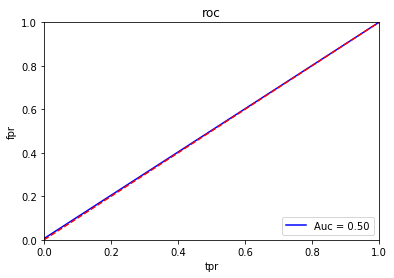

In [62]:
plt.title("roc")
plt.plot(fpr1,tpr1,'b',label = 'Auc = %0.2f'% roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

In [64]:
df.head(5)

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,OCCUPATION,state
0,0,0,36067.0,2016.0,0,3
1,0,1,242674.0,2016.0,4,4
2,0,1,193066.0,2016.0,4,2
3,0,1,220314.0,2016.0,4,3
5,0,1,225000.0,2016.0,4,1


In [65]:
x.shape

(95787, 17)

In [66]:
df["OCCUPATION"].value_counts()

8    26709
7    26092
3    23776
4    15633
1     1275
2     1197
6      746
5      358
0        1
Name: OCCUPATION, dtype: int64

In [67]:
df["state"].value_counts()

0    34898
3    26296
4    13360
1    10949
2    10284
Name: state, dtype: int64

In [72]:
p=knn.predict([[0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4567,781]])

In [69]:
p

array([0])

In [73]:
import pickle
pickle.dump(knn,open("projectfinal1.pkl",'wb'))

In [80]:
df["CASE_STATUS"].value_counts()

0    93597
1     2190
Name: CASE_STATUS, dtype: int64

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().